# Anaemia Prediction

# Importing Libraries

In [2]:
import numpy as np                                   # To import numpy

In [3]:
import pandas as pd                                   # To import pandas as pd

In [4]:
import matplotlib.pyplot as plt                       # To import matplotlib as plt

In [5]:
import seaborn as sns                                 # To import seaborn as sns

# Anaemia

It is a condition in which you lack enough healthy red blood cells to carry adequate oxygen to your body's tissues.
Having anemia, also referred to as low hemoglobin, can make you feel tired and weak. 
There are many forms of anemia, each with its own cause.

# Description about the columns

Anemia dataset containing attributes Gender, Hemoglobin, MCHC, MCV, MCH and Results. 
This dataset is used to predict if a patient is likely to suffer from anemia.
Machine learning binary classifier algorithm to be used.

Gender: 0 - male, 1 - female
Hemoglobin: Hemoglobin is a protein in your red blood cells that carries oxygen to your body's organs and tissues and transports
carbon dioxide from your organs and tissues back to your lungs.
MCH: MCH is short for "mean corpuscular hemoglobin." It's the average amount in each of your red blood cells of a protein called
hemoglobin, which carries oxygen around your body.
MCHC: MCHC stands for mean corpuscular hemoglobin concentration. It's a measure of the average concentration of hemoglobin 
inside a single red blood cell.
MCV: MCV stands for mean corpuscular volume. An MCV blood test measures the average size of your red blood cells.
Results: 0- not anemic, 1-anemic

# Importing Dataset

In [6]:
a=pd.read_csv("anemia.csv")                        # To load data
a

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9,1
1417,1,12.1,28.3,30.4,86.9,1
1418,1,13.1,17.7,28.1,80.7,1
1419,0,14.3,16.2,29.5,95.2,0


# Data Analysis

In [7]:
a.isnull().sum()                                            ;# To check if there are any null values.

Maximum

In [8]:
a["Hemoglobin"].max()

16.9

In [9]:
a["MCH"].max()

30.0

In [10]:
a["MCHC"].max()

32.5

In [11]:
a["MCV"].max()

101.6

Minimum

In [12]:
a["Hemoglobin"].min()

6.6

In [13]:
a["MCH"].min()

16.0

In [14]:
a["MCHC"].min()

27.8

In [15]:
a["MCV"].min()

69.4

In [24]:
a.info()                                                       # To get information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [25]:
a.describe()                                                     # To describe set(like max,min,mean,count.....)

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


In [26]:
a.shape                                                               # To find number of rows and columns.

(1421, 6)

In [27]:
a.count()                                                             #To count the number of each columns and rows

Gender        1421
Hemoglobin    1421
MCH           1421
MCHC          1421
MCV           1421
Result        1421
dtype: int64

In [12]:
b=a.groupby(["Gender"])
b

In [13]:
male=b.get_group(0)
male

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
5,0,11.6,22.3,30.9,74.5,1
8,0,14.1,29.7,30.5,75.2,0
...,...,...,...,...,...,...
1413,0,13.2,25.6,31.1,100.4,0
1414,0,13.0,26.2,31.3,74.9,0
1416,0,10.6,25.4,28.2,82.9,1
1419,0,14.3,16.2,29.5,95.2,0


In [14]:
female=b.get_group(1)
female

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
4,1,14.7,22.0,28.2,99.5,0
6,1,12.7,19.5,28.9,82.9,1
7,1,12.7,28.5,28.2,92.3,1
9,1,14.9,25.8,31.3,82.9,0
...,...,...,...,...,...,...
1406,1,12.9,19.5,28.7,87.7,1
1411,1,12.1,18.9,31.2,76.0,1
1415,1,13.2,20.1,28.8,91.2,1
1417,1,12.1,28.3,30.4,86.9,1


In [15]:
b.describe()

Hemoglobin                                                       MCH  \
            count       mean       std  min   25%    50%   75%   max  count   
Gender                                                                        
0           681.0  13.390162  2.047166  6.6  11.6  13.40  15.0  16.9  681.0   
1           740.0  13.433514  1.906427  9.0  11.8  13.15  15.1  16.9  740.0   

                   ...   MCV        Result                                     \
             mean  ...   75%    max  count      mean       std  min  25%  50%   
Gender             ...                                                          
0       22.901322  ...  94.8  101.6  681.0  0.305433  0.460929  0.0  0.0  0.0   
1       22.909595  ...  93.4  101.6  740.0  0.556757  0.497104  0.0  0.0  1.0   

                  
        75%  max  
Gender            
0       1.0  1.0  
1       1.0  1.0  

[2 rows x 40 columns]

# Data Visualization


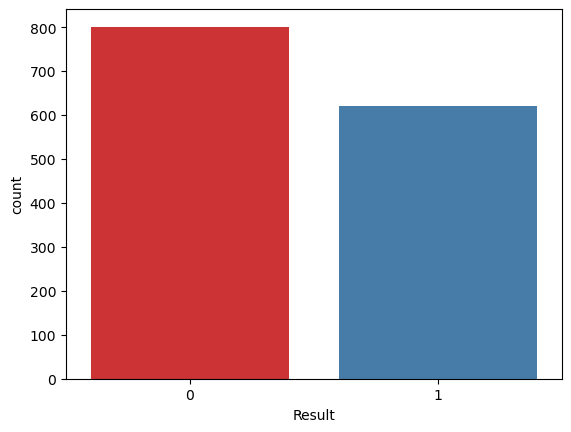

In [29]:
sns.countplot(x="Result",data=a,palette="Set1")                   # non anemic people are more
plt.show()

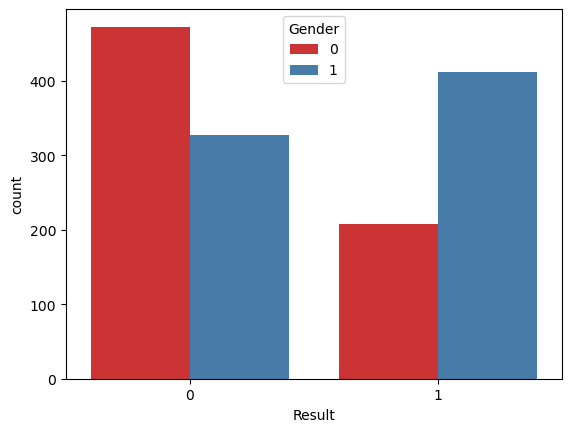

In [30]:
sns.countplot(x="Result",hue="Gender",data=a,palette="Set1")           # Females are mostly affected
plt.show()

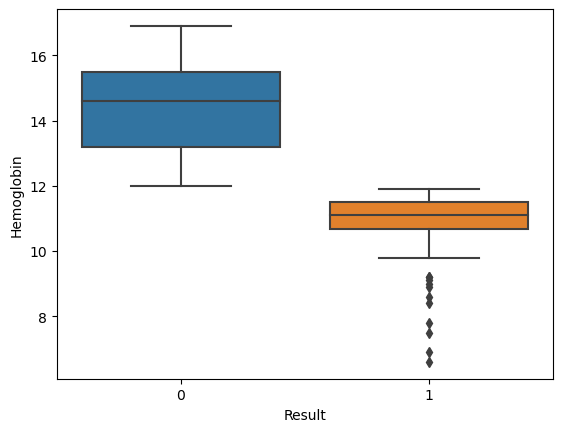

In [25]:
sns.boxplot(x="Result",y="Hemoglobin",data=male)                     
plt.show()

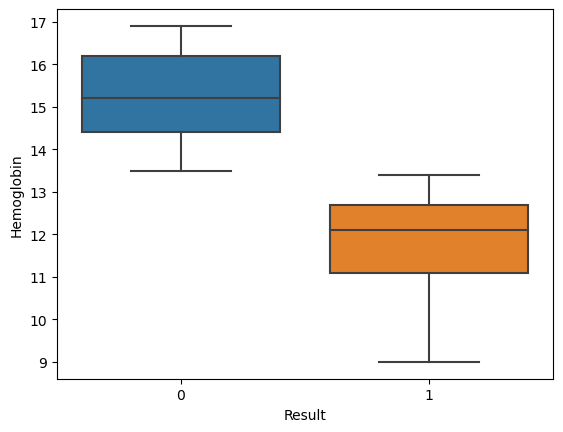

In [24]:
sns.boxplot(x="Result",y="Hemoglobin",data=female)                     
plt.show()

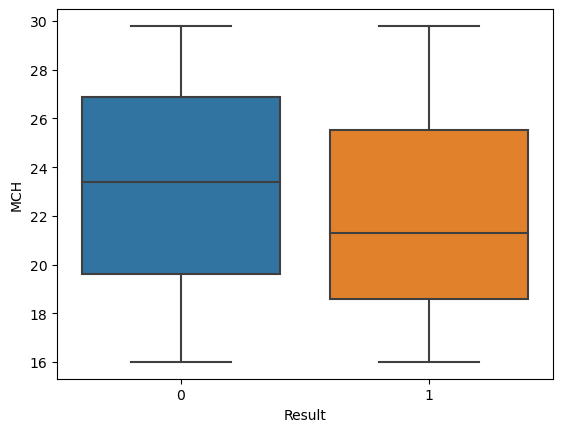

In [26]:
sns.boxplot(x="Result",y="MCH",data=male)                     
plt.show()

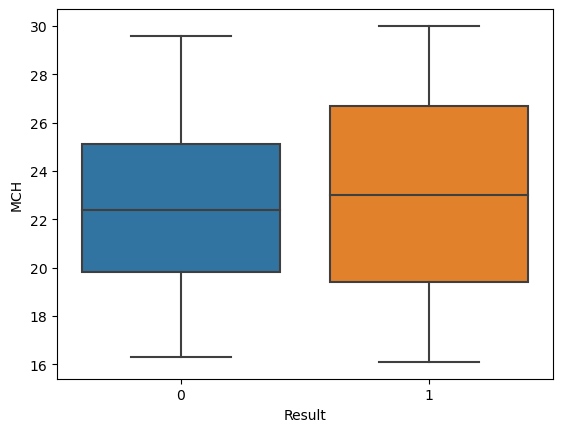

In [27]:
sns.boxplot(x="Result",y="MCH",data=female)                     
plt.show()

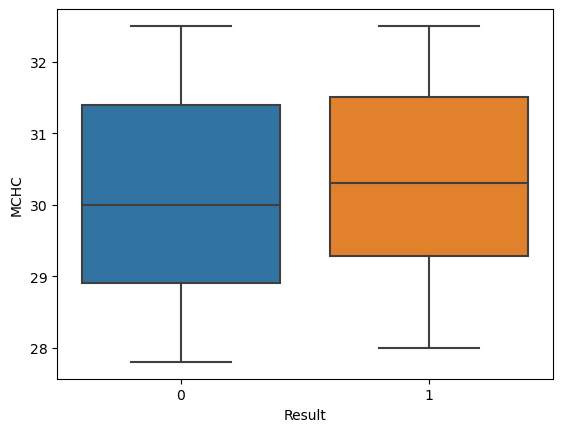

In [28]:
sns.boxplot(x="Result",y="MCHC",data=male)                     
plt.show()

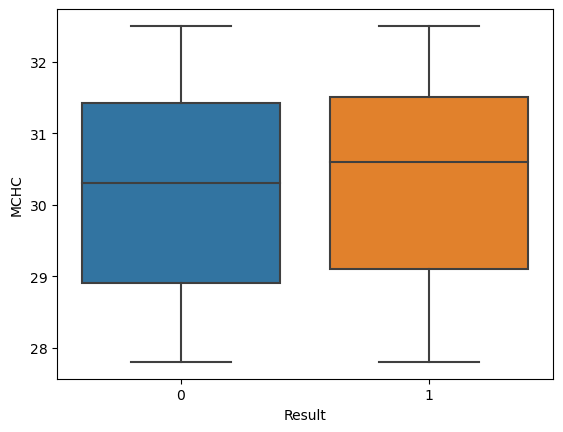

In [29]:
sns.boxplot(x="Result",y="MCHC",data=female)                       
plt.show()

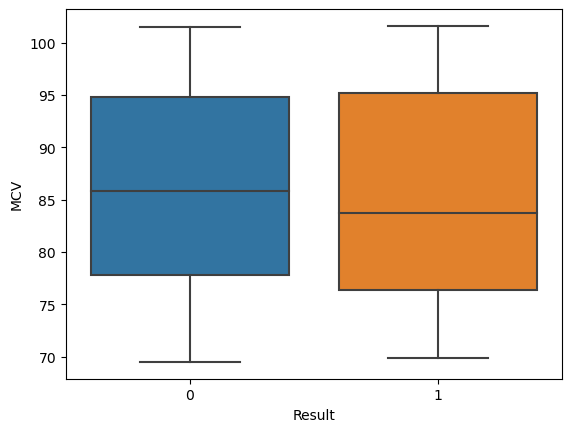

In [30]:
sns.boxplot(x="Result",y="MCV",data=male)                     # Comparitively same for both
plt.show()

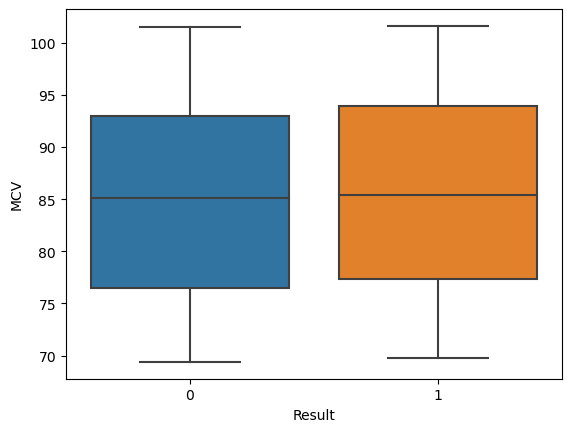

In [31]:
sns.boxplot(x="Result",y="MCV",data=female)                     # Anemic females have more MCV
plt.show()

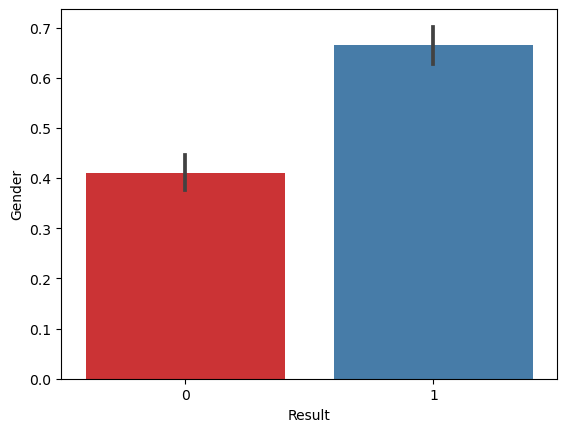

In [33]:
sns.barplot(x="Result",y="Gender",data=a,palette="Set1")           # Females are mostly affected
plt.show()

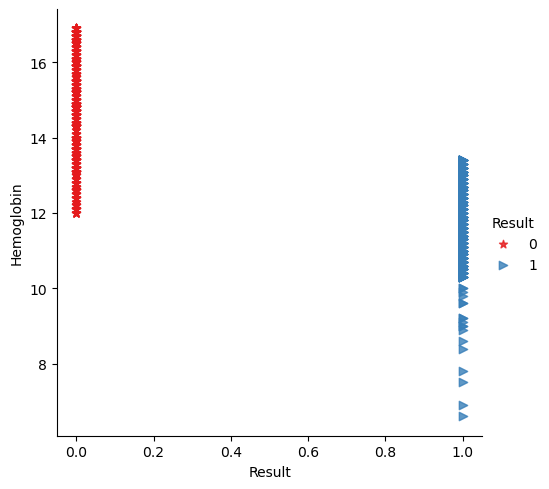

In [68]:
sns.lmplot(x="Result",y="Hemoglobin",hue="Result",data=a,palette="Set1",markers=["*",">"])   # more hemoglobon - non anemic people
plt.show()

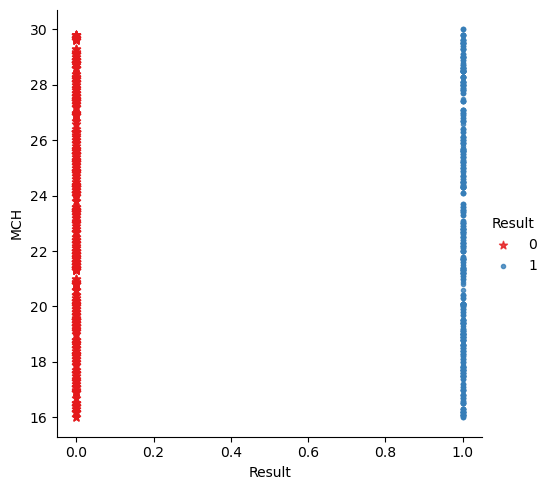

In [69]:
sns.lmplot(x="Result",y="MCH",hue="Result",data=a,palette="Set1",markers=["*","."])   # more MCH - mostle same for both cases     
plt.show()

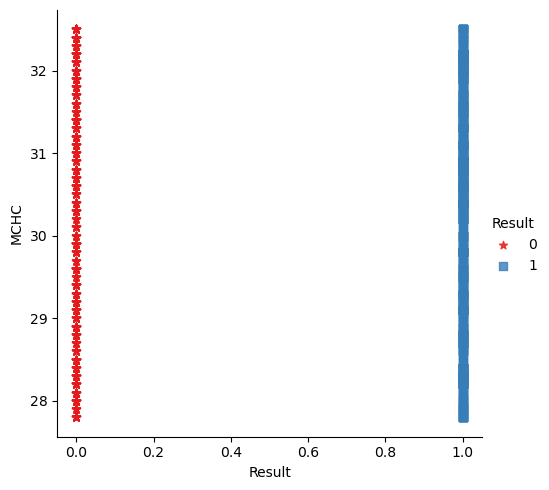

In [70]:
sns.lmplot(x="Result",y="MCHC",hue="Result",data=a,palette="Set1",markers=["*",","])   # more MCHC - mostle same for both cases           
plt.show()

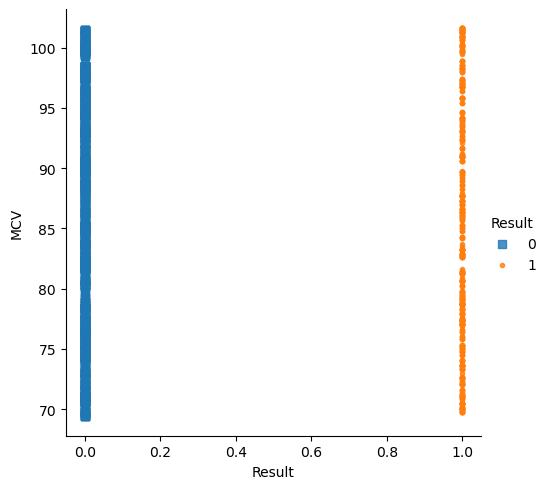

In [72]:
sns.lmplot(x="Result",y="MCV",hue="Result",data=a,markers=[",","."])    # more MCV - mostle same for both cases       
plt.show()

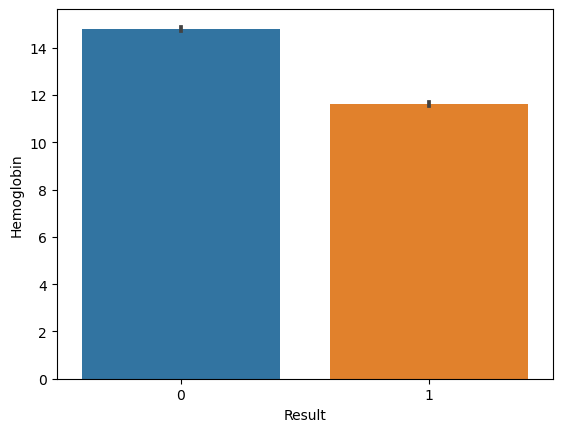

In [58]:
sns.barplot(x="Result",y="Hemoglobin",data=a)                          # Anemic people are more
plt.show()

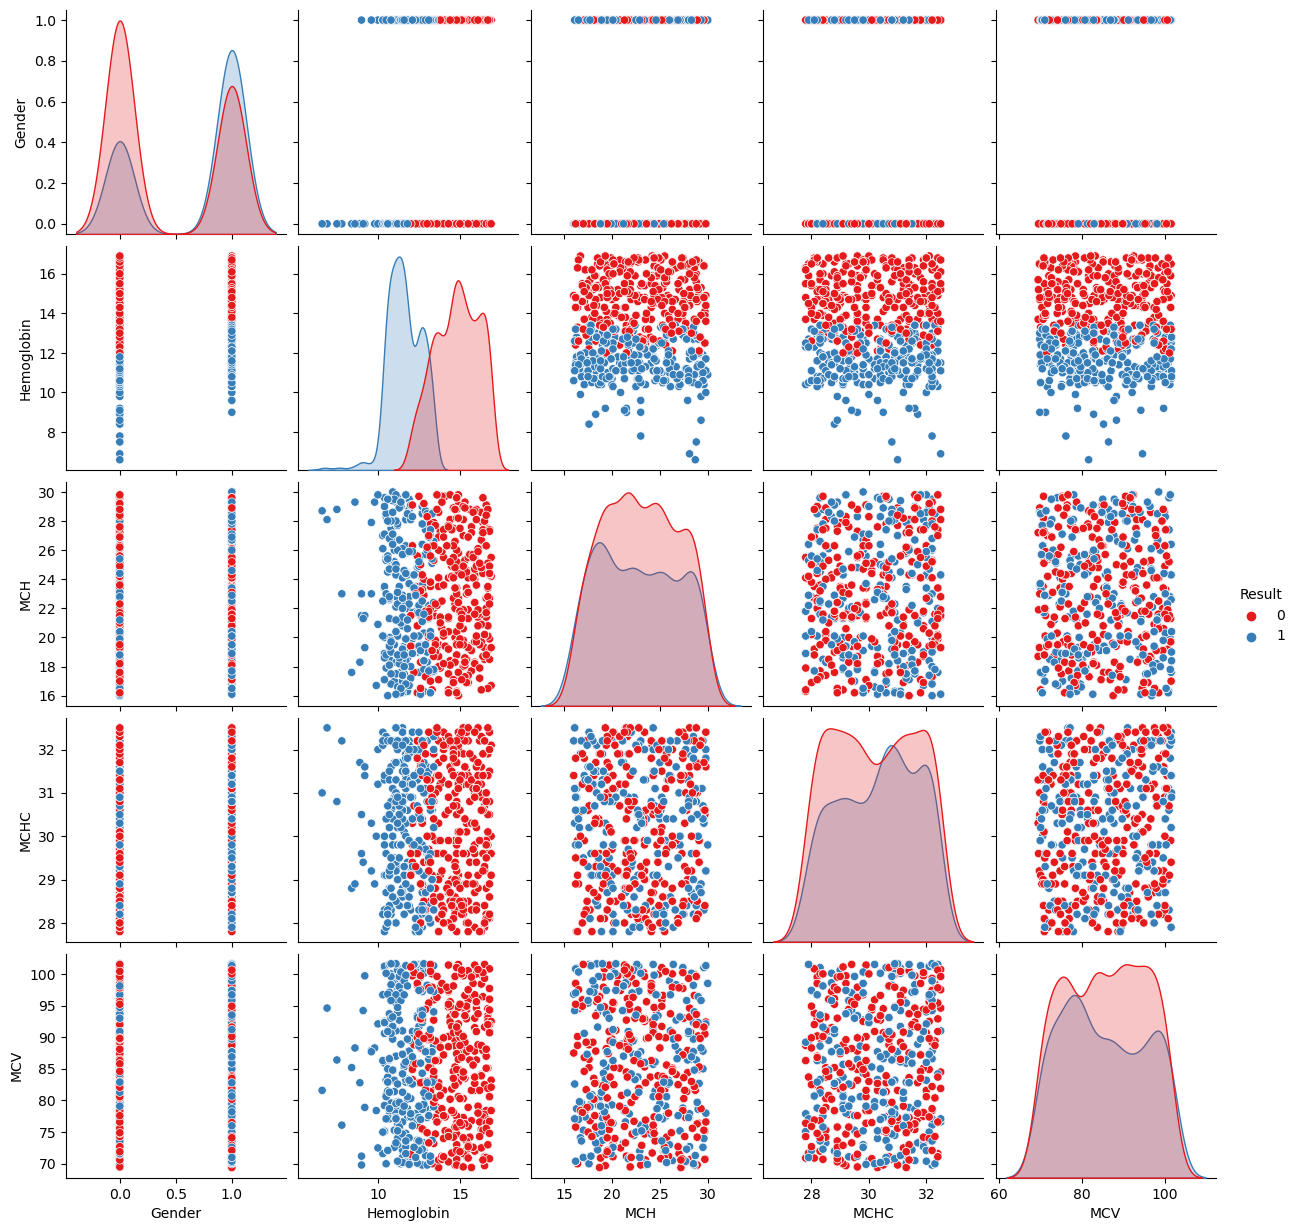

In [31]:
sns.pairplot(hue="Result",data=a,palette="Set1")
plt.show()

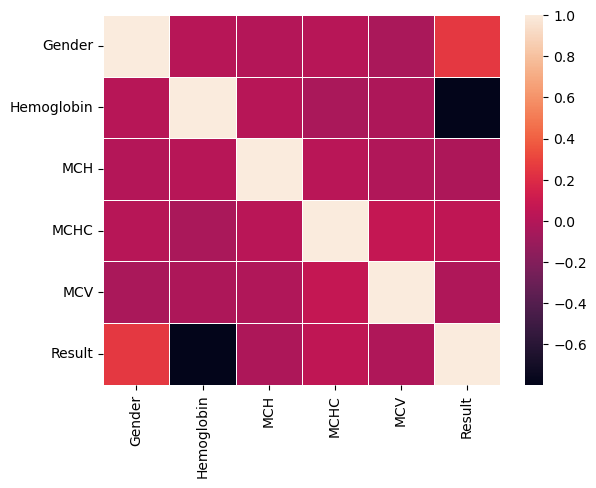

In [32]:
sns.heatmap(a.corr(),cbar=True,linewidth=0.5)
plt.show()

# Prediction - Classification

In [17]:
x=a.iloc[:,:-1].values
x

array([[ 1. , 14.9, 22.7, 29.1, 83.7],
       [ 0. , 15.9, 25.4, 28.3, 72. ],
       [ 0. ,  9. , 21.5, 29.6, 71.2],
       ...,
       [ 1. , 13.1, 17.7, 28.1, 80.7],
       [ 0. , 14.3, 16.2, 29.5, 95.2],
       [ 0. , 11.8, 21.2, 28.4, 98.1]])

In [19]:
y=a.iloc[:,-1].values
y

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=10,random_state=10)

In [22]:
x_test

array([[ 0. , 15.8, 28.6, 31.1, 96.6],
       [ 1. , 13.5, 22.1, 29.6, 74.7],
       [ 0. , 15.7, 19.1, 28.9, 99.5],
       [ 0. , 15.8, 28.6, 31.1, 96.6],
       [ 1. , 11.1, 25. , 31.7, 79.5],
       [ 1. , 12.1, 28.3, 30.4, 86.9],
       [ 1. , 16.6, 29.1, 29.9, 76.4],
       [ 1. , 14.3, 21.4, 31.2, 88.5],
       [ 1. , 14.8, 23. , 30.5, 69.8],
       [ 1. , 11.1, 22.8, 28. , 97.3]])

In [25]:
x_train

array([[  0. ,  13.3,  16.4,  29.1,  70. ],
       [  0. ,  13.1,  20. ,  29.7,  89.7],
       [  1. ,  13.3,  17.6,  32.4, 101.5],
       ...,
       [  0. ,  16.9,  25.5,  29.6,  83.2],
       [  1. ,  15.1,  24.3,  31.4,  76.1],
       [  0. ,  15.2,  21.9,  29.6,  69.5]])

In [23]:
y_train

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [24]:
y_test

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

# SVC

In [125]:
from sklearn.svm import SVC

In [126]:
classifier1=SVC(kernel="linear")
classifier1.fit(x_train,y_train)

SVC(kernel='linear')

In [127]:
xpred1=classifier1.predict(x_train)
xpred1

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [128]:
ypred1=classifier1.predict(x_test)
ypred1

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [129]:
trainingscore1=classifier1.score(x_train,y_train)
trainingscore1

0.9950389794472005

In [130]:
testingscore1=classifier1.score(x_test,y_test)
testingscore1

1.0

In [131]:
from sklearn import metrics

In [132]:
print("mae"),metrics.mean_absolute_error(y_test,ypred1)

mae


(None, 0.0)

In [133]:
print("mse"),metrics.mean_squared_error(y_test,ypred1)

mse


(None, 0.0)

In [134]:
print("rmse"),np.sqrt(metrics.mean_squared_error(y_test,ypred1))

rmse


(None, 0.0)

In [135]:
print("rmae"),np.sqrt(metrics.mean_absolute_error(y_test,ypred1))

rmae


(None, 0.0)

In [136]:
from sklearn.metrics import r2_score

In [137]:
r1=r2_score(y_test,ypred1)
r1

1.0

In [138]:
from sklearn.metrics import confusion_matrix

In [139]:
cm1=confusion_matrix(y_test,ypred1)
cm1

array([[7, 0],
       [0, 3]], dtype=int64)

In [140]:
data={"actual":y_test,
      "predict":ypred,
       "correct":y_test==ypred1}
new1=pd.DataFrame(data)
new1

,actual,predict,correct
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,1,1,True
5,1,1,True
6,0,0,True
7,0,0,True
8,0,0,True
9,1,1,True


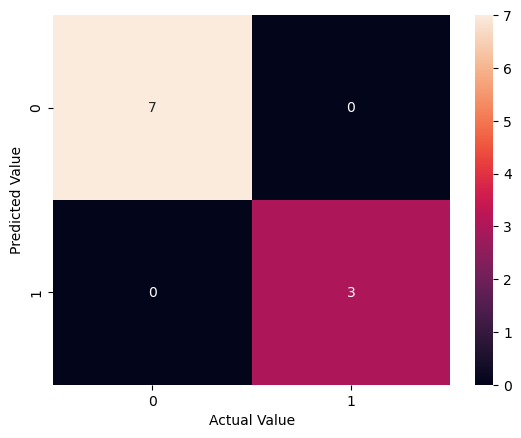

In [141]:
sns.heatmap(cm1,annot=True)                               # cm1 - variable of confusion matrix
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

# Decision Tree

In [142]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
classifier2=DecisionTreeClassifier(criterion="entropy",random_state=0)

In [144]:
classifier2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [145]:
xpred2=classifier2.predict(x_train)
xpred2

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [146]:
ypred2=classifier2.predict(x_test)
ypred2

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [147]:
trainingscore2=classifier2.score(x_train,y_train)
trainingscore2

1.0

In [148]:
testingscore2=classifier2.score(x_test,y_test)
testingscore2

1.0

In [150]:
print("mae"),metrics.mean_absolute_error(y_test,ypred2)

mae


(None, 0.0)

In [151]:
print("mse"),metrics.mean_squared_error(y_test,ypred2)

mse


(None, 0.0)

In [152]:
print("rmse"),np.sqrt(metrics.mean_squared_error(y_test,ypred2))

rmse


(None, 0.0)

In [153]:
print("rmae"),np.sqrt(metrics.mean_absolute_error(y_test,ypred2))

rmae


(None, 0.0)

In [154]:
r2=r2_score(y_test,ypred2)
r2

1.0

In [155]:
cm2=confusion_matrix(y_test,ypred2)
cm2

array([[7, 0],
       [0, 3]], dtype=int64)

In [156]:
data={"actual":y_test,
      "predict":ypred,
       "correct":y_test==ypred2}
new2=pd.DataFrame(data)
new2

,actual,predict,correct
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,1,1,True
5,1,1,True
6,0,0,True
7,0,0,True
8,0,0,True
9,1,1,True


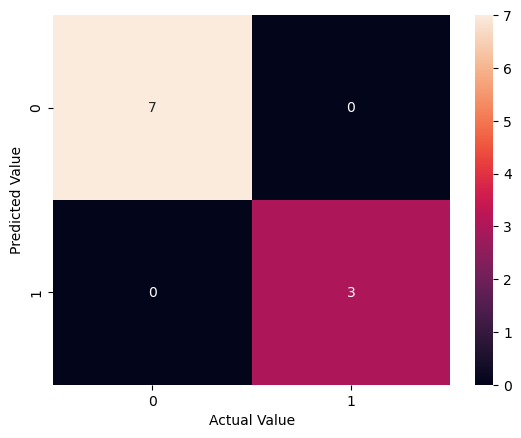

In [157]:
sns.heatmap(cm2,annot=True)                               # cm2 - variable of confusion matrix
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

# Random Forest

In [158]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
rfc=RandomForestClassifier(random_state=100)
rfc

RandomForestClassifier(random_state=100)

In [160]:
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=100)

In [161]:
xpred3=rfc.predict(x_train)
xpred3

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [162]:
ypred3=rfc.predict(x_test)
ypred3

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [163]:
trainingscore3=rfc.score(x_train,y_train)
trainingscore3

1.0

In [164]:
testingscore3=rfc.score(x_test,y_test)
testingscore3

1.0

In [165]:
print("mae"),metrics.mean_absolute_error(y_test,ypred3)

mae


(None, 0.0)

In [166]:
print("mse"),metrics.mean_squared_error(y_test,ypred3)

mse


(None, 0.0)

In [167]:
print("rmse"),np.sqrt(metrics.mean_squared_error(y_test,ypred3))

rmse


(None, 0.0)

In [168]:
print("rmae"),np.sqrt(metrics.mean_absolute_error(y_test,ypred3))

rmae


(None, 0.0)

In [169]:
r3=r2_score(y_test,ypred3)
r3

1.0

In [170]:
cm3=confusion_matrix(y_test,ypred3)
cm3

array([[7, 0],
       [0, 3]], dtype=int64)

In [171]:
data={"actual":y_test,
      "predict":ypred,
       "correct":y_test==ypred3}
new3=pd.DataFrame(data)
new3

,actual,predict,correct
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,1,1,True
5,1,1,True
6,0,0,True
7,0,0,True
8,0,0,True
9,1,1,True


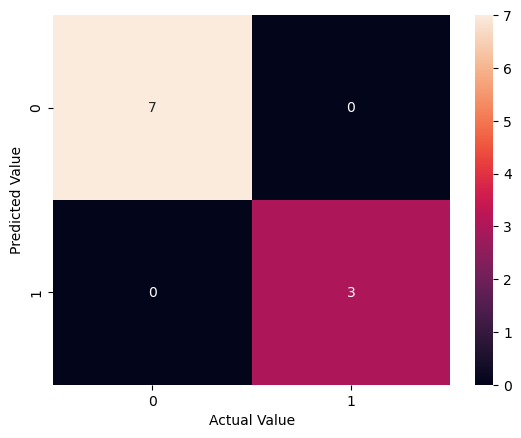

In [172]:
sns.heatmap(cm3,annot=True)                               # cm3 - variable of confusion matrix
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

# GaussianNB

In [178]:
from sklearn.naive_bayes import GaussianNB

In [179]:
gauss=GaussianNB()
gauss

GaussianNB()

In [180]:
gauss.fit(x_train,y_train)

GaussianNB()

In [181]:
xpred4=gauss.predict(x_train)
xpred4

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [182]:
ypred4=gauss.predict(x_test)
ypred4

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [183]:
trainingscore4=gauss.score(x_train,y_train)
trainingscore4

0.9383416017009213

In [184]:
testingscore4=gauss.score(x_test,y_test)
testingscore4

1.0

In [185]:
print("mae"),metrics.mean_absolute_error(y_test,ypred4)

mae


(None, 0.0)

In [186]:
print("mse"),metrics.mean_squared_error(y_test,ypred4)

mse


(None, 0.0)

In [187]:
print("rmse"),np.sqrt(metrics.mean_squared_error(y_test,ypred4))

rmse


(None, 0.0)

In [188]:
print("rmae"),np.sqrt(metrics.mean_absolute_error(y_test,ypred4))

rmae


(None, 0.0)

In [189]:
r4=r2_score(y_test,ypred4)
r4

1.0

In [190]:
cm4=confusion_matrix(y_test,ypred4)
cm4

array([[7, 0],
       [0, 3]], dtype=int64)

In [191]:
data={"actual":y_test,
      "predict":ypred,
       "correct":y_test==ypred4}
new4=pd.DataFrame(data)
new4

,actual,predict,correct
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,1,1,True
5,1,1,True
6,0,0,True
7,0,0,True
8,0,0,True
9,1,1,True


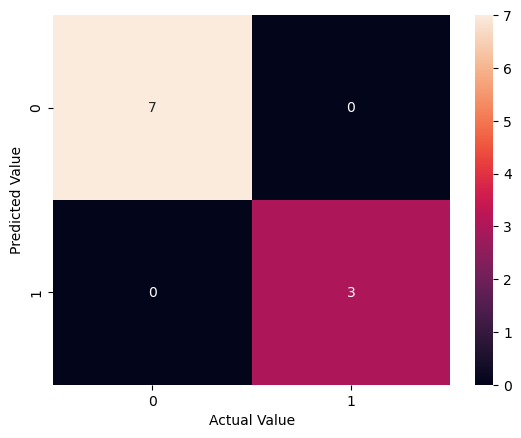

In [192]:
sns.heatmap(cm4,annot=True)                               # cm4 - variable of confusion matrix
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

# KNeighbor

In [193]:
from sklearn.neighbors import KNeighborsClassifier                     #KNEIGHBORSCLASSIFIER
knc=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [194]:
xpred5=knc.predict(x_train)
xpred5

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [195]:
ypred5=knc.predict(x_test)
ypred5

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [196]:
trainingscore5=knc.score(x_train,y_train)
trainingscore5

0.9829907866761163

In [197]:
testingscore5=knc.score(x_test,y_test)
testingscore5

1.0

In [198]:
print("mae"),metrics.mean_absolute_error(y_test,ypred5)

mae


(None, 0.0)

In [199]:
print("mse"),metrics.mean_squared_error(y_test,ypred5)

mse


(None, 0.0)

In [200]:
print("rmse"),np.sqrt(metrics.mean_squared_error(y_test,ypred5))

rmse


(None, 0.0)

In [201]:
print("rmae"),np.sqrt(metrics.mean_absolute_error(y_test,ypred5))

rmae


(None, 0.0)

In [202]:
r5=r2_score(y_test,ypred5)
r5

1.0

In [203]:
cm5=confusion_matrix(y_test,ypred5)
cm5

array([[7, 0],
       [0, 3]], dtype=int64)

In [204]:
data={"actual":y_test,
      "predict":ypred,
       "correct":y_test==ypred5}
new5=pd.DataFrame(data)
new5

,actual,predict,correct
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,1,1,True
5,1,1,True
6,0,0,True
7,0,0,True
8,0,0,True
9,1,1,True


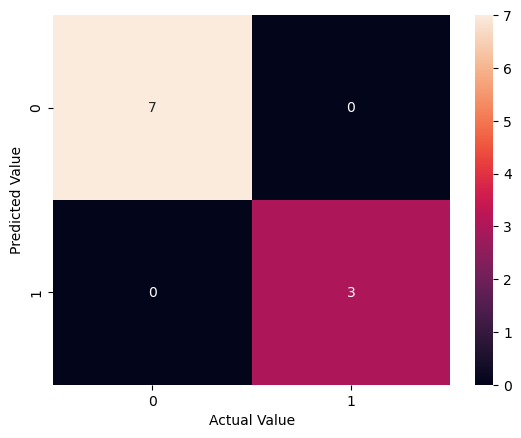

In [205]:
sns.heatmap(cm5,annot=True)                               # cm5 - variable of confusion matrix
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

In [206]:
z=pd.DataFrame({"ML Models":["SVC","Decision Tree","Random Forest","Gaussion","KNeighbor"],
               "Accuracy Score":[testingscore1,testingscore2,testingscore3,testingscore4,testingscore5]})
z

,ML Models,Accuracy Score
0,SVC,1.0
1,Decision Tree,1.0
2,Random Forest,1.0
3,Gaussion,1.0
4,KNeighbor,1.0


,ML Models,Accuracy Score
0,SVC,1.0
1,Decision Tree,1.0
2,Random Forest,1.0
3,Gaussion,1.0
4,KNeighbor,1.0


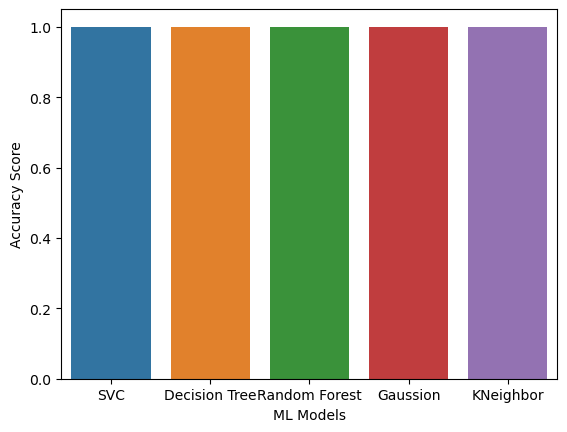

In [207]:
sns.barplot(x="ML Models",y="Accuracy Score",data=z)      # All classifications have good accuracy.
z.sort_values(by="Accuracy Score",ascending=False)

# Test Data's Accuracy Of All Models

Test data accuracy in SVC - 100%
Test data accuracy in Gaussian - 100%
Test data accuracy in Decision Tree - 100%
Test data accuracy in Random Forest - 100%
Test data accuracy in Kneighbor - 100%

HENCE ALL MODELS ARE BEST TO PREDICT THE ANAEMIA DATASET